# User behavior

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# Load the real user review dataset
reviews_df = pd.read_csv(r"C:\Mostafa\Learnning\Steam\DataSets\Raw\steam_reviews.csv")
steam_df = pd.read_csv(r"C:\Mostafa\Learnning\Steam\DataSets\Raw\steam.csv")
tags_df = pd.read_csv(r"C:\Mostafa\Learnning\Steam\DataSets\Raw\steamspy_tag_data.csv")
# Preview first few rows
reviews_df.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [3]:
# Info and structure
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


In [4]:
reviews_df.isnull().sum()

app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64

In [5]:
reviews_df = reviews_df.dropna(subset=['app_name'])

In [6]:
user_game_matrix = reviews_df.pivot_table(
    index='app_id', 
    columns='app_name', 
    values='review_score'
).fillna(0)

user_game_matrix.head()

app_name,神明的一天世界-God's One Day World,! That Bastard Is Trying To Steal Our Gold !,"!""We Are The Dwarves""!","""Glow Ball"" - The billiard puzzle game",#SelfieTennis,#killallzombies,$1 Ride,'n Verlore Verstand,.EXE,001 Game Creator,...,the static speaks my name,theBlu,theHunter Classic,theHunter: Primal,vrAMP,ルナティックドーン レジェンドパック,ルナティックドーン 前途への道標,丛林守望者（Ranger of the jungle）,侠客风云传(Tale of Wuxia),拯救大魔王2 Rescue the Great Demon 2
app_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Count how many users reviewed each game
review_counts = reviews_df['app_name'].value_counts()

# Keep games reviewed by at least 100 users
popular_games = review_counts[review_counts >= 100].index

# Filter original dataset
filtered_df = reviews_df[reviews_df['app_name'].isin(popular_games)]

# Create new matrix
user_game_matrix = filtered_df.pivot_table(
    index='app_id',
    columns='app_name',
    values='review_score'
).fillna(0)

user_game_matrix.head()

app_name,"!""We Are The Dwarves""!",0RBITALIS,10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,1001 Spikes,12 Labours of Hercules,12 Labours of Hercules II: The Cretan Bull,12 Labours of Hercules III: Girl Power,...,planetarian ~the reverie of a little planet~,rFactor,rFactor 2,realMyst: Masterpiece Edition,rymdkapsel,the static speaks my name,theBlu,theHunter Classic,theHunter: Primal,侠客风云传(Tale of Wuxia)
app_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Filter to only games with at least 500 reviews
popular_games = reviews_df['app_name'].value_counts()
popular_games = popular_games[popular_games >= 500].index

# Rebuild matrix using only those games
filtered_df = reviews_df[reviews_df['app_name'].isin(popular_games)]

# Create matrix again
user_game_matrix = filtered_df.pivot_table(
    index='app_id',
    columns='app_name',
    values='review_score'
).fillna(0)

# Recompute similarity
from sklearn.metrics.pairwise import cosine_similarity
game_similarity_matrix = cosine_similarity(user_game_matrix.T)

collab_similarity_df = pd.DataFrame(game_similarity_matrix, 
                                  index=user_game_matrix.columns, 
                                  columns=user_game_matrix.columns)

# Try again
collab_similarity_df['Terraria'].sort_values(ascending=False).head(6)


app_name
Terraria                  1.0
theHunter: Primal         0.0
10,000,000                0.0
100% Orange Juice         0.0
12 Labours of Hercules    0.0
140                       0.0
Name: Terraria, dtype: float64

In [9]:
def recommend(game_name, n=5):
    if game_name not in collab_similarity_df.columns:
        return f"Game '{game_name}' not found."
    
    # Drop itself, sort similar games
    similar_scores = collab_similarity_df[game_name].drop(game_name)
    top_games = similar_scores.sort_values(ascending=False).head(n)
    
    return top_games

In [10]:
recommend("Terraria", 5)

app_name
theHunter: Primal         0.0
10,000,000                0.0
100% Orange Juice         0.0
12 Labours of Hercules    0.0
140                       0.0
Name: Terraria, dtype: float64

In [11]:
collab_similarity_df.to_pickle(r"C:\Mostafa\Learnning\Steam\Models\collab_similarity_df.pkl")

Top 20 Most Reviewed Games

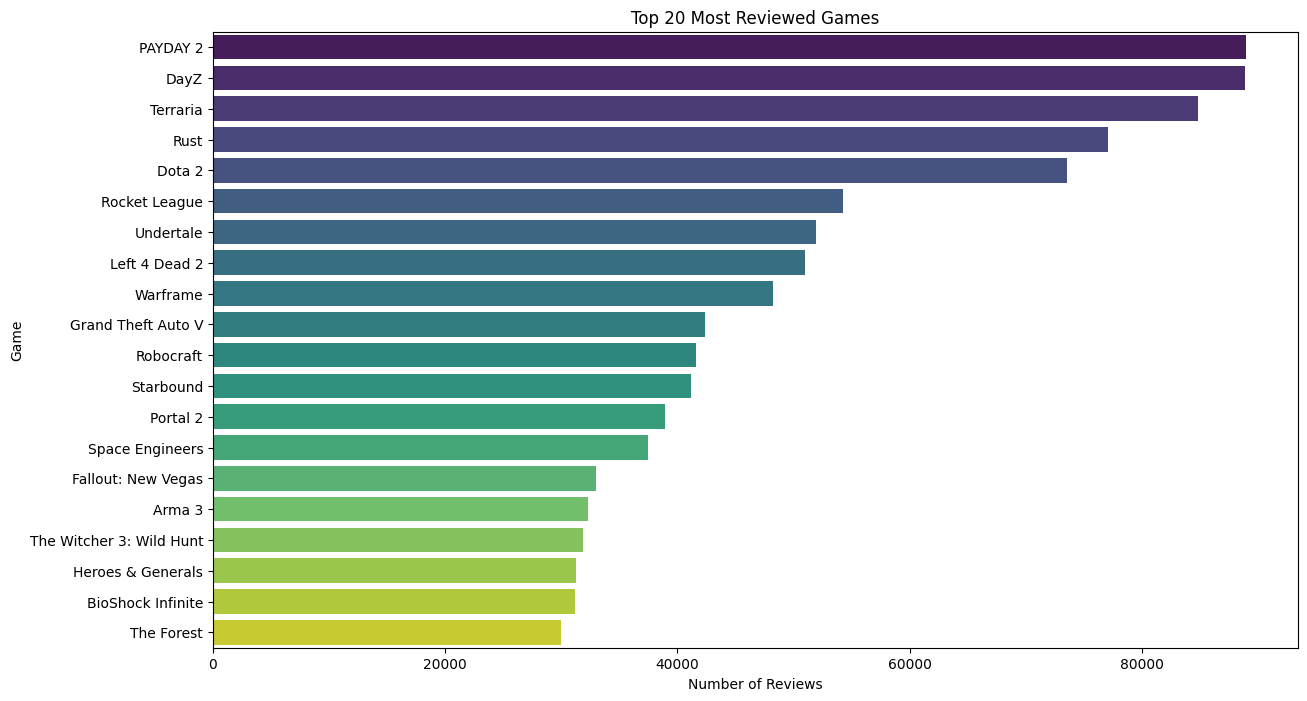

In [12]:
# Count most reviewed games
most_reviewed_games = reviews_df['app_name'].value_counts().head(20)

plt.figure(figsize=(14, 8))
sns.barplot(y=most_reviewed_games.index, 
            x=most_reviewed_games.values, 
            hue=most_reviewed_games.index, 
            dodge=False, 
            palette="viridis", 
            legend=False)
plt.title("Top 20 Most Reviewed Games")
plt.xlabel("Number of Reviews")
plt.ylabel("Game")
plt.show()

Distribution of Review Scores

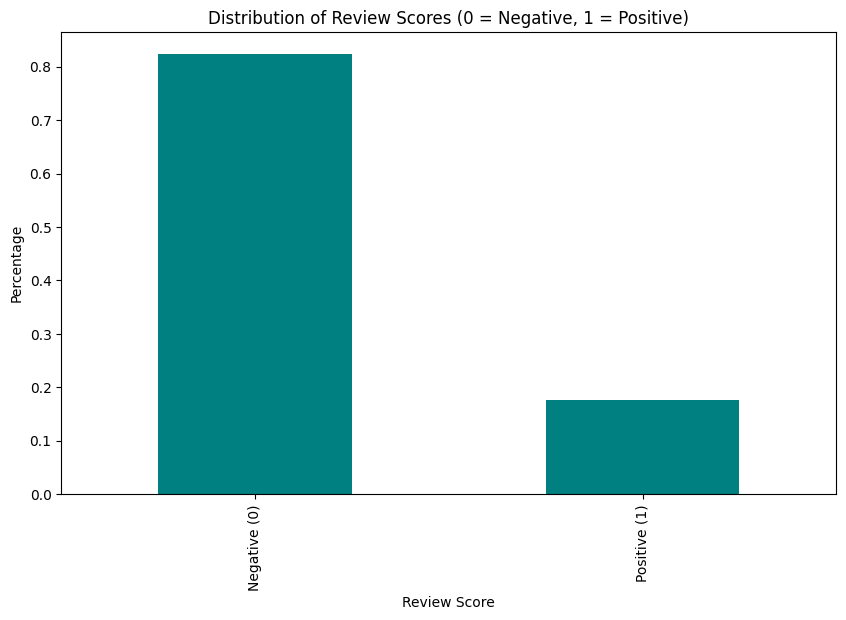

In [13]:
plt.figure(figsize=(10, 6))
reviews_df['review_score'].value_counts(normalize=True).plot(kind='bar', color='teal')
plt.title("Distribution of Review Scores (0 = Negative, 1 = Positive)")
plt.xlabel("Review Score")
plt.ylabel("Percentage")
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.show()

User-Game Matrix

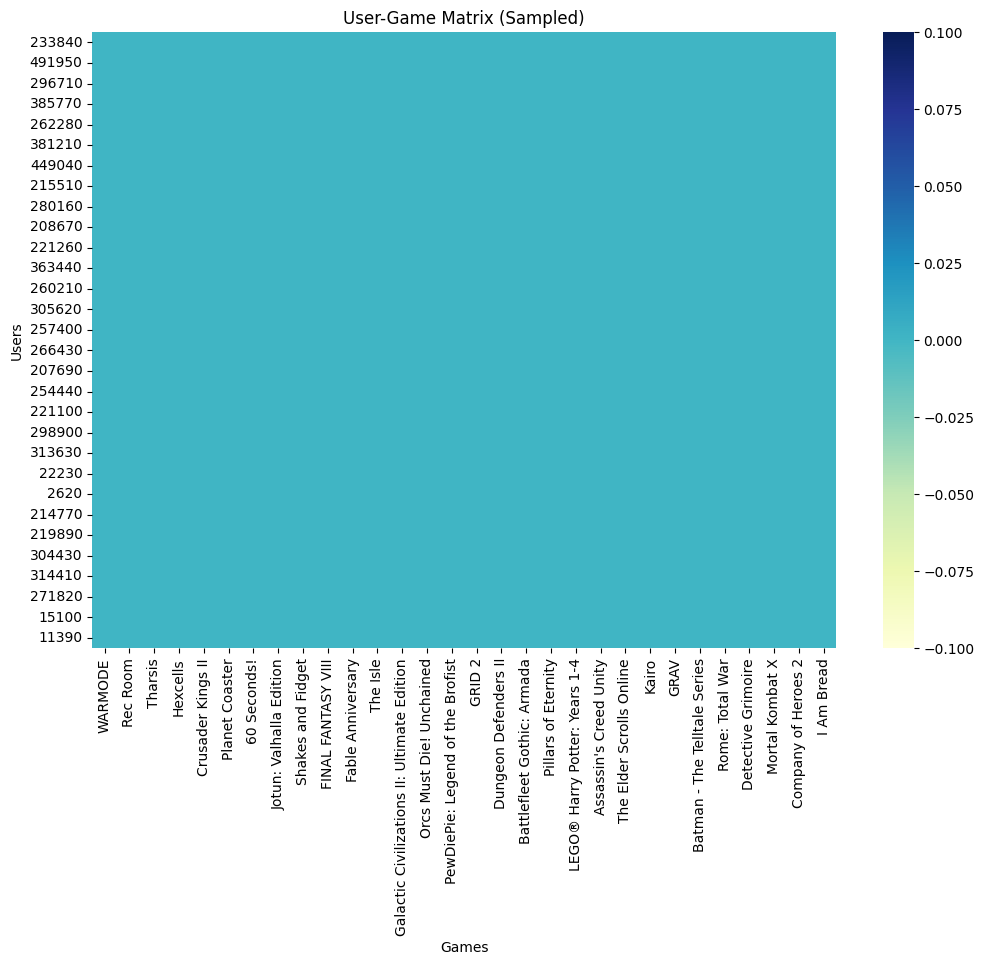

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(user_game_matrix.sample(30, axis=0).sample(30, axis=1), cmap="YlGnBu")
plt.title("User-Game Matrix (Sampled)")
plt.xlabel("Games")
plt.ylabel("Users")
plt.show()

Game Popularity vs Average Rating

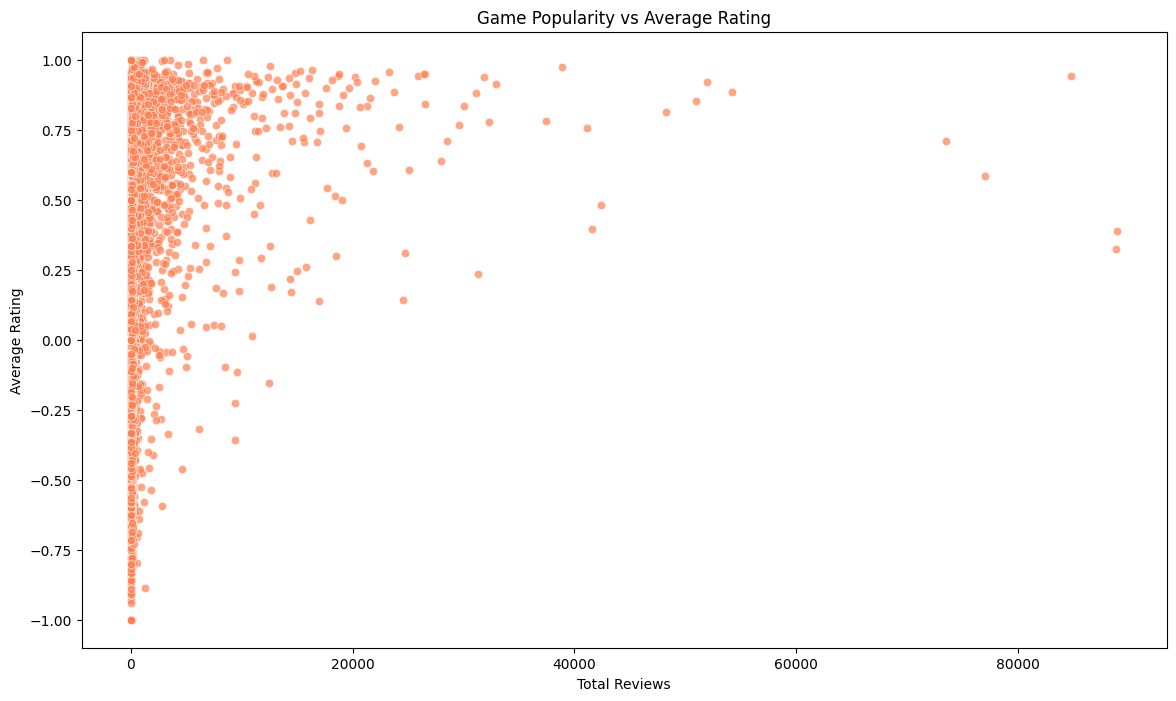

In [15]:
# Calculate average rating and total reviews per game
game_ratings = reviews_df.groupby('app_name').agg({'review_score': 'mean', 'app_id': 'count'}).reset_index()
game_ratings.columns = ['app_name', 'average_rating', 'total_reviews']

plt.figure(figsize=(14, 8))
sns.scatterplot(x='total_reviews', y='average_rating', data=game_ratings, alpha=0.7, color='coral')
plt.title("Game Popularity vs Average Rating")
plt.xlabel("Total Reviews")
plt.ylabel("Average Rating")
plt.show()


Top 20 Developers by Total Reviews

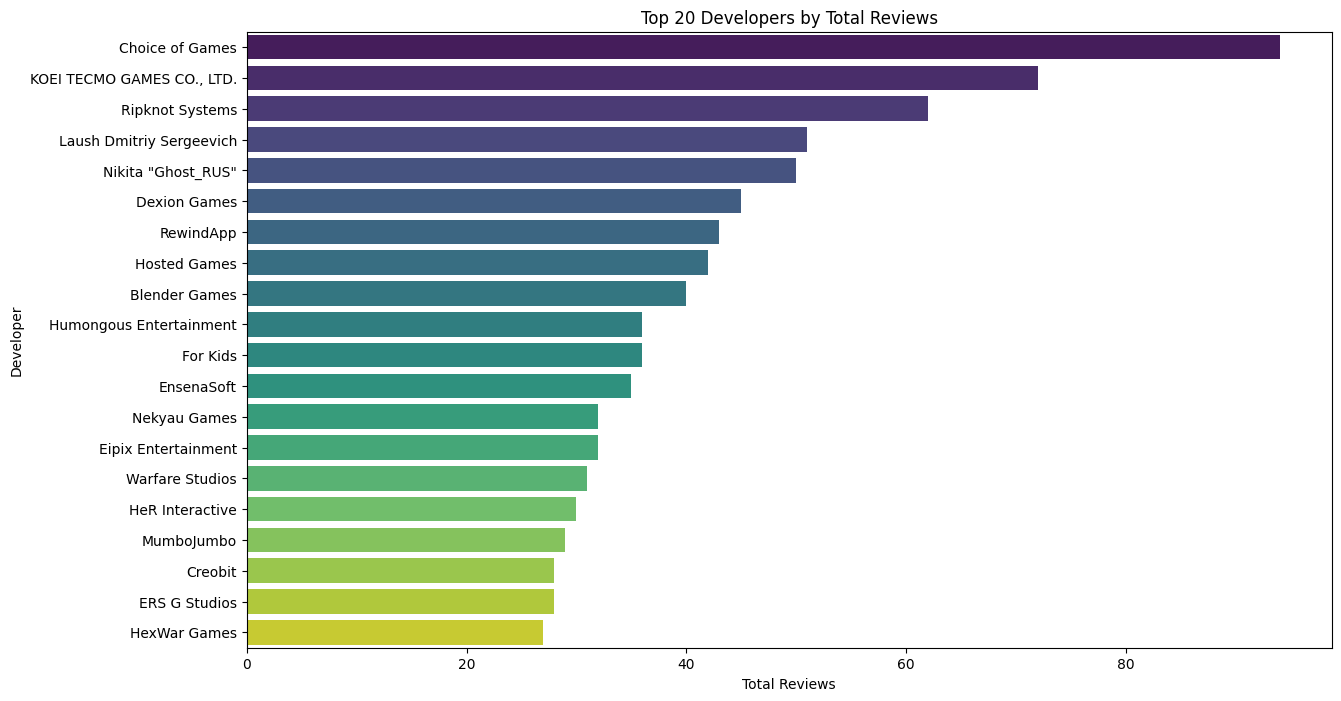

In [16]:
top_developers = steam_df['developer'].value_counts().head(20)

plt.figure(figsize=(14, 8))
sns.barplot(y=top_developers.index, 
            x=top_developers.values, 
            hue=top_developers.index, 
            dodge=False, 
            palette="viridis", 
            legend=False)
plt.title("Top 20 Developers by Total Reviews")
plt.xlabel("Total Reviews")
plt.ylabel("Developer")
plt.show()


Distribution of Average Playtime

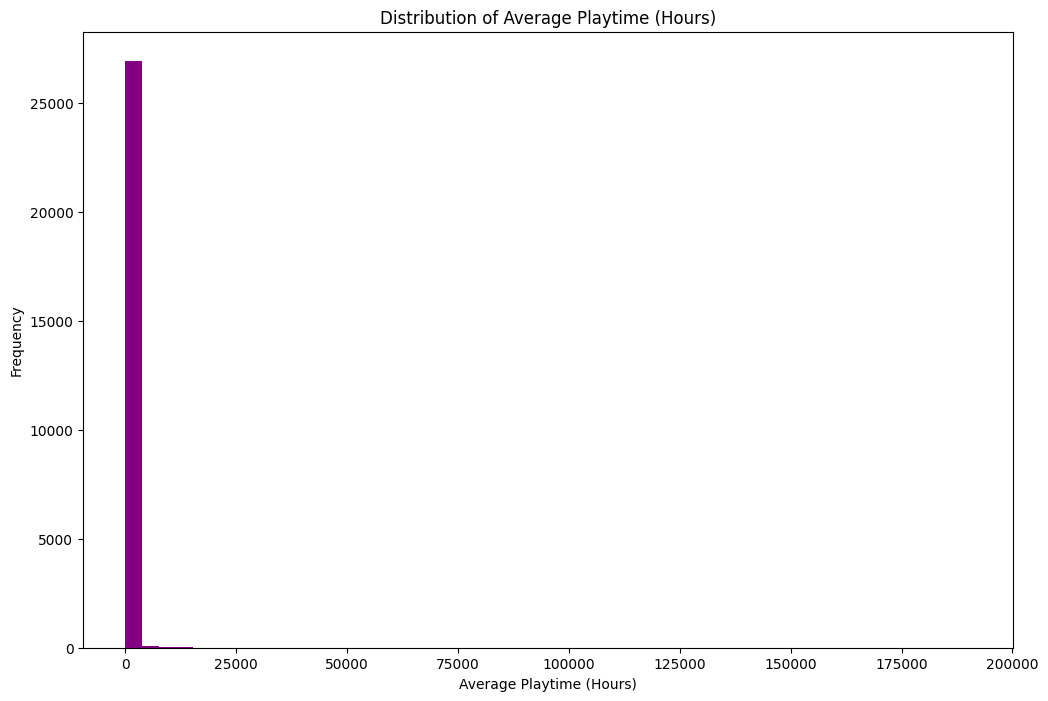

In [17]:
plt.figure(figsize=(12, 8))
steam_df['average_playtime'].plot(kind='hist', bins=50, color='purple')
plt.title("Distribution of Average Playtime (Hours)")
plt.xlabel("Average Playtime (Hours)")
plt.ylabel("Frequency")
plt.show()

Correlation Between Tags

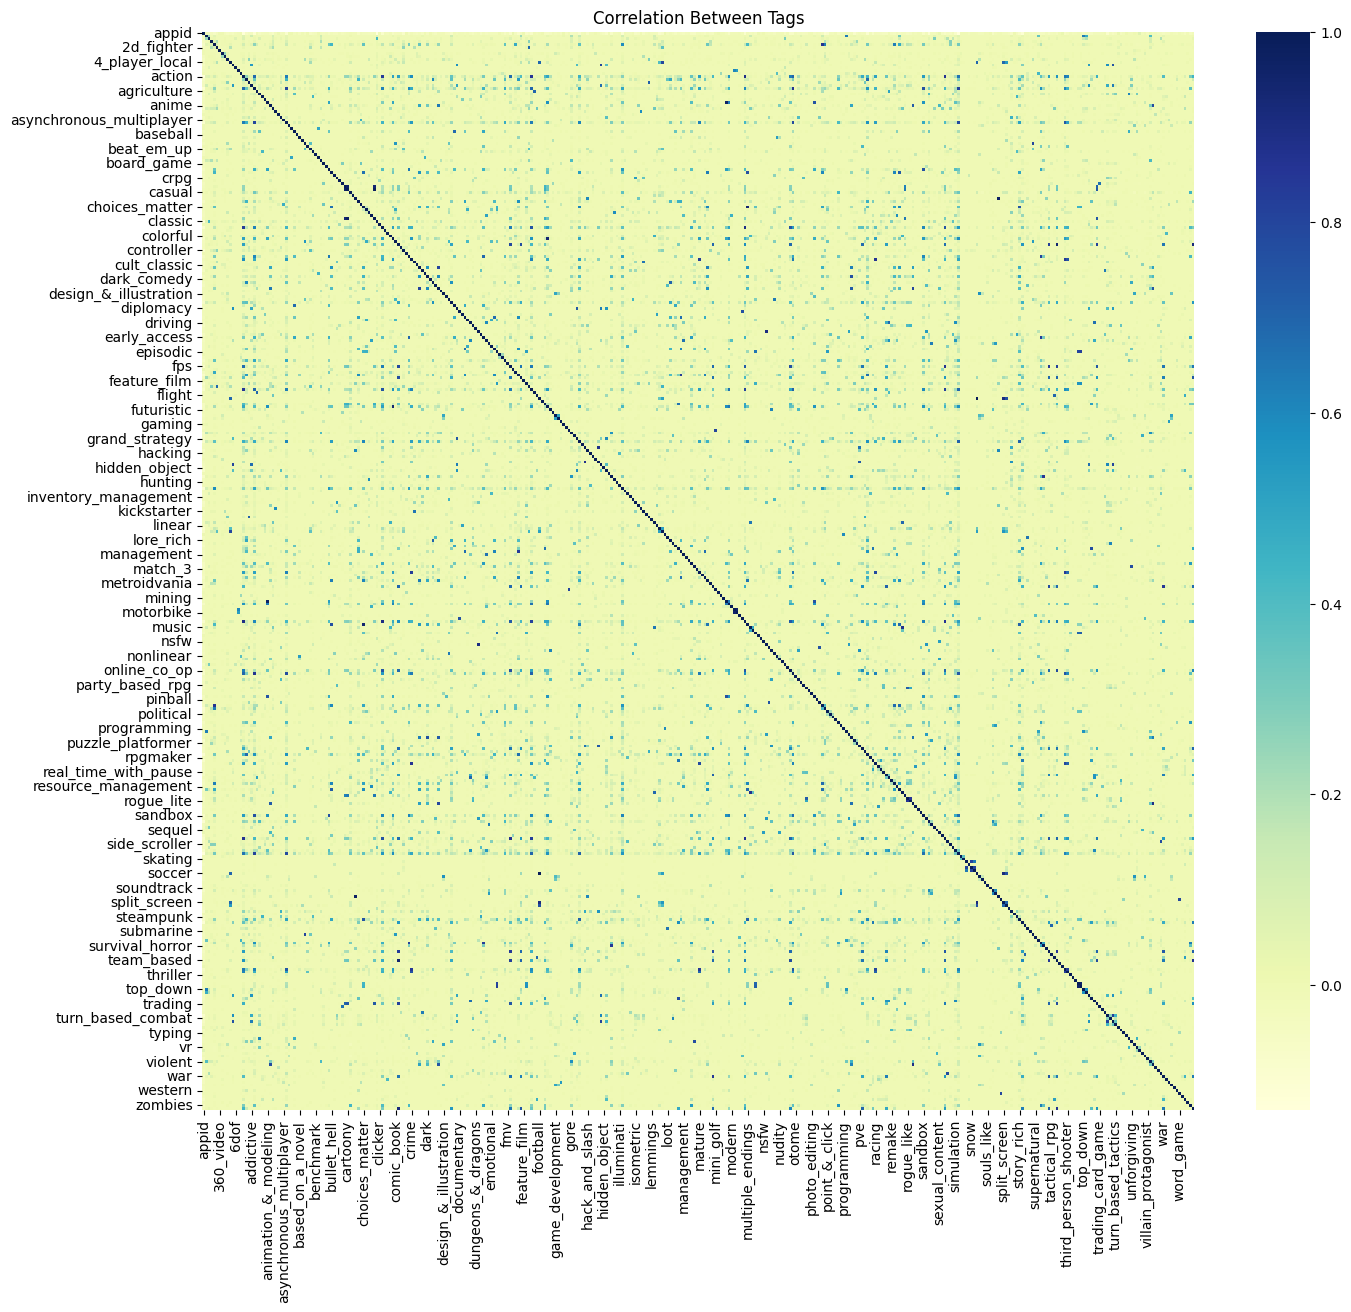

In [18]:
plt.figure(figsize=(16, 14))
sns.heatmap(tags_df.corr(), cmap="YlGnBu")
plt.title("Correlation Between Tags")
plt.show()


Total Positive vs Negative Reviews

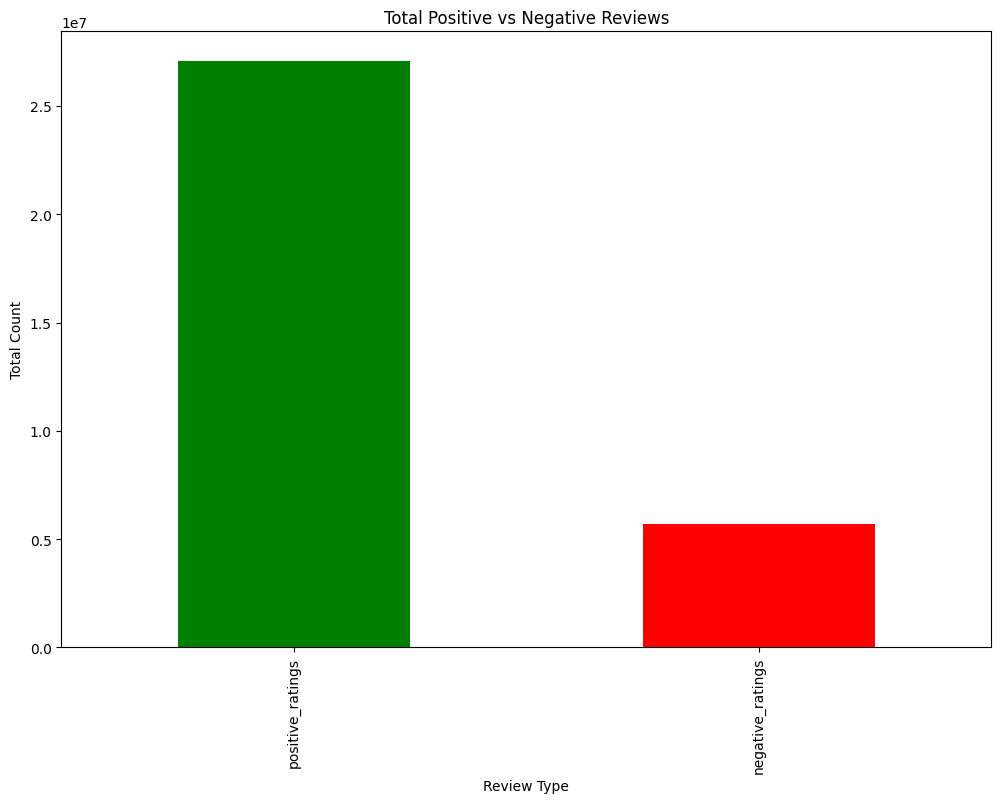

In [19]:
plt.figure(figsize=(12, 8))
steam_df[['positive_ratings', 'negative_ratings']].sum().plot(kind='bar', color=['green', 'red'])
plt.title("Total Positive vs Negative Reviews")
plt.xlabel("Review Type")
plt.ylabel("Total Count")
plt.show()


Top 20 Most Expensive Games

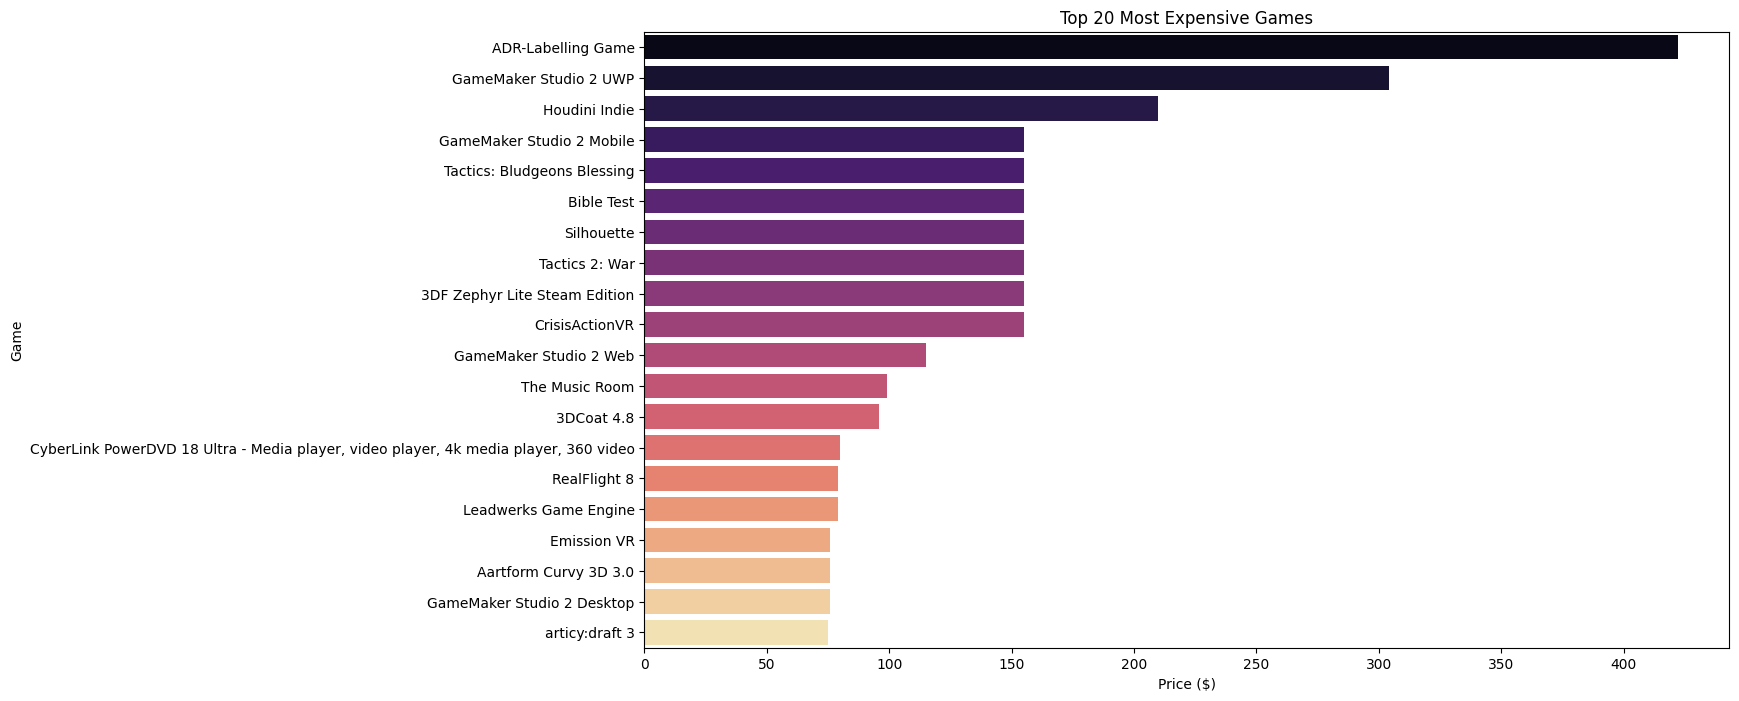

In [20]:
top_expensive_games = steam_df.sort_values(by='price', ascending=False).head(20)

plt.figure(figsize=(14, 8))
sns.barplot(y=top_expensive_games['name'], 
            x=top_expensive_games['price'], 
            hue=top_expensive_games['name'], 
            dodge=False, 
            palette="magma", 
            legend=False)
plt.title("Top 20 Most Expensive Games")
plt.xlabel("Price ($)")
plt.ylabel("Game")
plt.show()


Playtime vs Positive Ratings

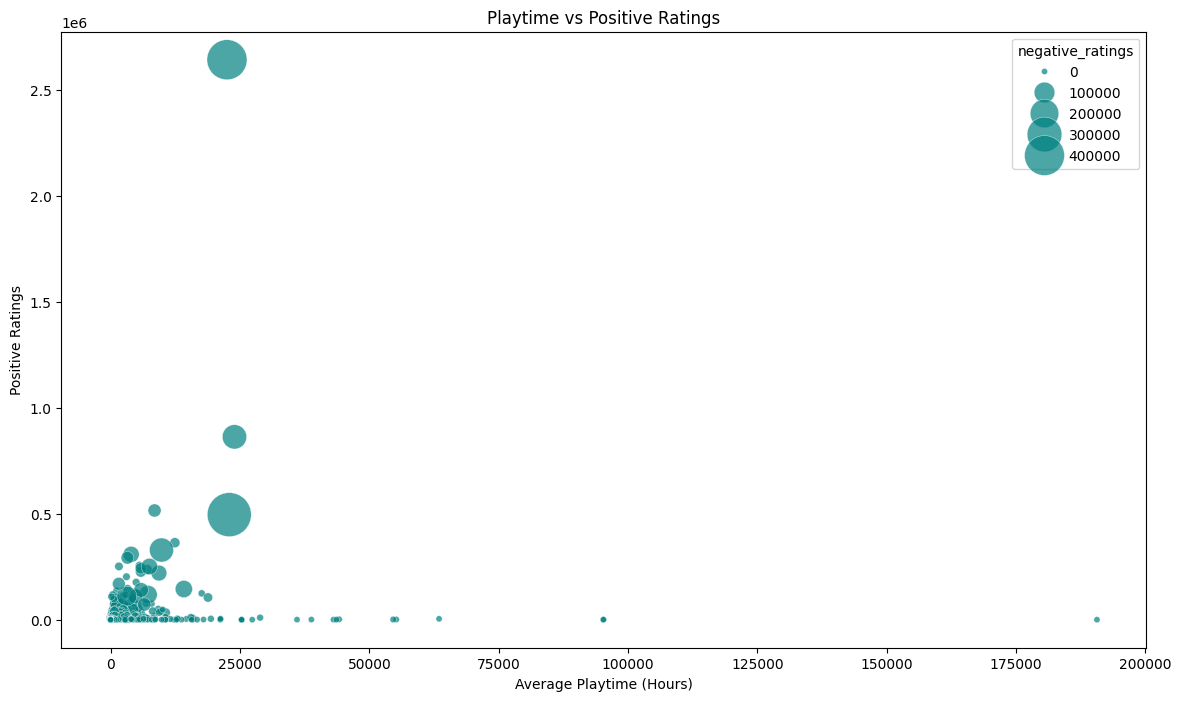

In [21]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='average_playtime', y='positive_ratings', size='negative_ratings', 
                data=steam_df, sizes=(20, 1000), alpha=0.7, color='teal')
plt.title("Playtime vs Positive Ratings")
plt.xlabel("Average Playtime (Hours)")
plt.ylabel("Positive Ratings")
plt.show()
